# **CORRELAÇÃO ENTRE DUAS VARIÁVEIS QUANTITATIVAS**

O objetivo é avaliar se existe relação entre as variáveis quantitativas estudadas, além do grau de correlação entre elas. Isto pode ser feito por meio de tabelas de distribuições de frequências, representações gráficas, como o diagrama de dispersão, além de medidas de correlação, como a covariância e o coeficiente de correlação de Pearson.

In [26]:
# importando bibliotecas
import pandas as pd
import numpy as np
import random
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

## **Resolução de case teórico**

Neste exemplo iremos estudar a correlação entre notas de 30 alunos de uma escola, nas disciplinas de Física, Matemática e Literatura.

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/vitormarx/ciencia-de-dados/main/datasets/notas.csv', delimiter=';')
df.head()

,Nota Matemática,Nota Física,Nota Literatura
0,5.5,7.5,9.0
1,9.0,8.5,5.5
2,4.5,5.0,6.5
3,6.5,8.0,6.5
4,7.5,6.0,5.0


## **Gráfico de dispersão**

A correlação entre duas variáveis quantitativas pode ser representada de forma gráfica por meio de um diagrama de dispersão. Ele representa graficamente os valores das variáveis X e Y em um plano cartesiano. Um
diagrama de dispersão permite, portanto, avaliar:
1. se existe ou não alguma relação entre as variáveis em estudo;
2. o tipo de relação entre as duas variáveis, isto é, a direção em que a variável Y aumenta ou diminui em função da variação de X;
3. o grau de relação entre as variáveis;
4. a natureza da relação (linear, exponencial, etc.).

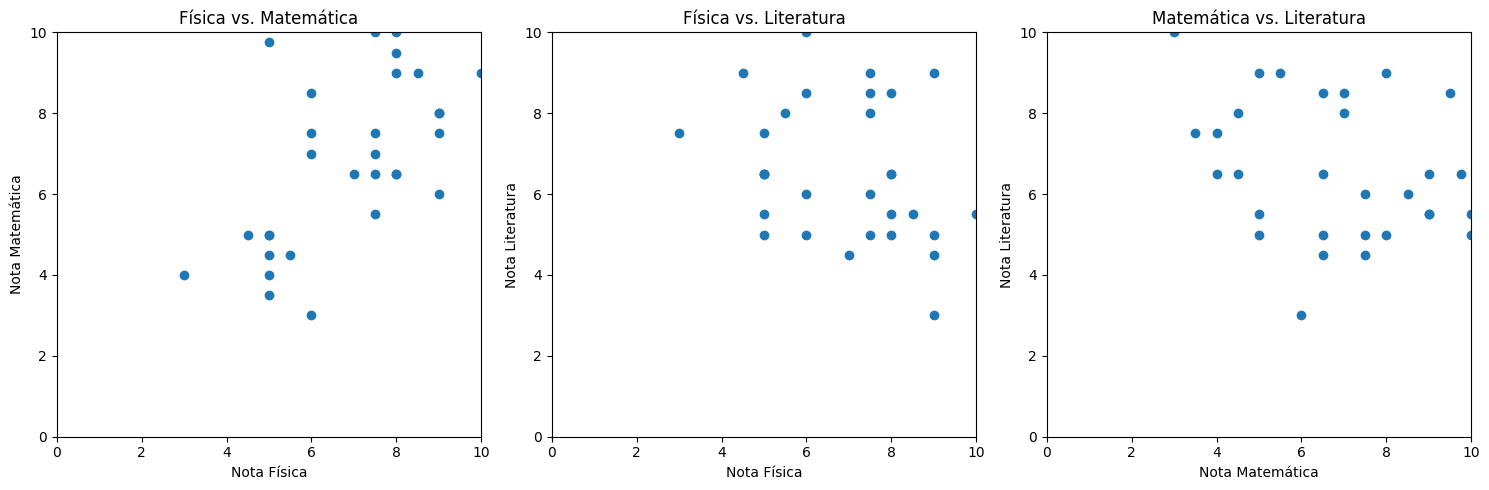

In [17]:
# Plotando os gráficos de dispersão lado a lado
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(df['Nota Física'], df['Nota Matemática'])
plt.xlabel('Nota Física')
plt.ylabel('Nota Matemática')
plt.title('Física vs. Matemática')
plt.xlim(0, 10)
plt.ylim(0, 10)

plt.subplot(1, 3, 2)
plt.scatter(df['Nota Física'], df['Nota Literatura'])
plt.xlabel('Nota Física')
plt.ylabel('Nota Literatura')
plt.title('Física vs. Literatura')
plt.xlim(0, 10)
plt.ylim(0, 10)

plt.subplot(1, 3, 3)
plt.scatter(df['Nota Matemática'], df['Nota Literatura'])
plt.xlabel('Nota Matemática')
plt.ylabel('Nota Literatura')
plt.title('Matemática vs. Literatura')
plt.xlim(0, 10)
plt.ylim(0, 10)

plt.tight_layout()

# Exibindo os gráficos
plt.show()

## **Medidas de Correlação**

As principais medidas de correlação utilizadas para variáveis quantitativas são a covariância e o coeficiente de
correlação de Pearson.

### **Covariância**
A covariância mede a variação conjunta entre duas variáveis quantitativas X e Y, e sua expressão é dada por:

<img src='https://tse2.mm.bing.net/th?id=OIP.cn1XXscHaNl8hFs7-MBZmAAAAA&pid=Api&P=0&h=180'></img>

em que:
* X: i-ésimo valor de X;
* Y: i-ésimo valor de Y;
* X: média dos valores de X;
* Y: média dos valores de Y;
* n: tamanho da amostra.

In [18]:
cov_fm = df['Nota Física'].cov(df['Nota Matemática'])
cov_fg = df['Nota Física'].cov(df['Nota Literatura'])
cov_mg = df['Nota Matemática'].cov(df['Nota Literatura'])

print(f'Covariância entre Física e Matemática: {cov_fm:.2f}')
print(f'Covariância entre Física e Literatura: {cov_fg:.2f}')
print(f'Covariância entre Matemática e Geografia: {cov_mg:.2f}')

Covariância entre Física e Matemática: 2.12
Covariância entre Física e Literatura: -0.85
Covariância entre Matemática e Geografia: -1.09


Uma das limitações da covariância é que a medida depende do tamanho da amostra, podendo levar a uma estimativa ruim em casos de pequenas amostras. O coeficiente de correlação de Pearson é a alternativa para esse
problema.

## **Coeficiente de corelação de Pearson**

<img src='https://calculareconverter.com.br/wp-content/uploads/2022/11/formula-correlacao.png'></img>

O coeficiente de correlação de Pearson (p) é uma medida que varia entre -1 e 1. Por meio do sinal, é possível verificar o tipo de relação linear entre as duas variáveis analisadas (direção em que a variável Y aumenta ou diminui em função da variação de X); quanto mais próximo dos valores extremos, mais forte é a correlação entre elas. Logo:
* Se p for positivo, existe uma relação diretamente proporcional entre as variáveis; se p = 1, tem-se uma correlação linear positiva perfeita.
* Se p for negativo, existe uma relação inversamente proporcional entre as variáveis; se p = -1, tem-se uma correlação linear negativa perfeita.
* Se p for nulo, não existe correlação entre as variáveis.

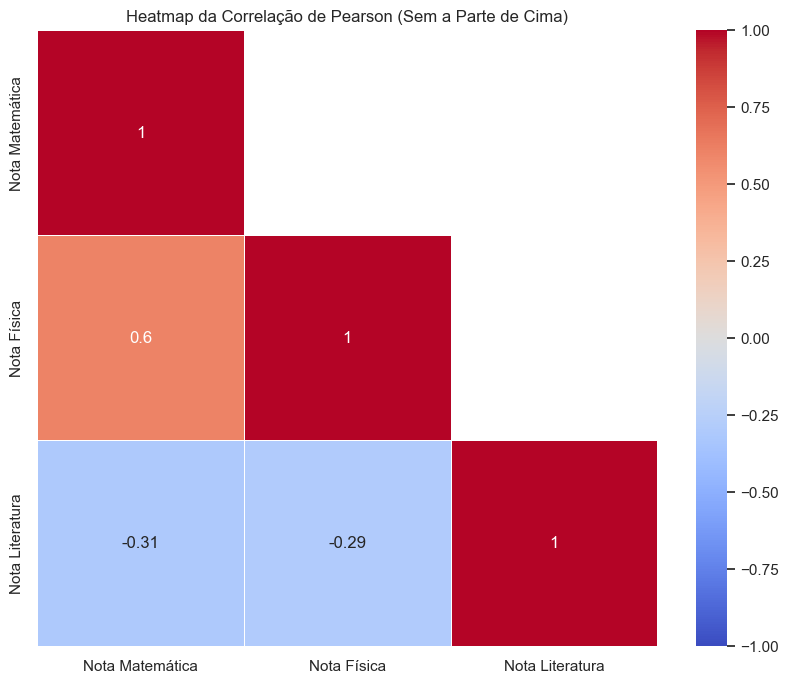

In [37]:
def calcular_correlacao(df: list[float]) -> None:
    correlation_matrix = df.corr()
    
    # Configura o estilo do heatmap
    sns.set(style="white")

    # Cria o heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, mask=np.triu(correlation_matrix, k=1), annot=True, cmap='coolwarm', linewidths=.5,
                center=0, vmin=-1, vmax=1)
    plt.title("Heatmap da Correlação de Pearson (Sem a Parte de Cima)")
    plt.show()

calcular_correlacao(df)

Aqui notamos uma tendência de uma correlação positiva moderada entre Física e Matemática. As demais associações tendem a ter carrelações negativas próximas a 0, o que nos permite afirmar quem não têm correlação.